In [1]:
import tensorflow as tf
import os

In [ ]:
#for GPU
'''gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)'''

In [2]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

C:\Users\UBADA DAWOOD\AppData\Local\Temp\ipykernel_6416\2123835270.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
img = cv2.imread(os.path.join('data', 'train', 'FAKE', '1000 (2).jpg'))

In [4]:
img.shape

(32, 32, 3)

### Loading the data

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory('data/train', image_size=(32, 32))


Found 100000 files belonging to 2 classes.


In [6]:
test_data = tf.keras.utils.image_dataset_from_directory('data/test', image_size=(32, 32))


Found 20000 files belonging to 2 classes.


In [7]:
data_it = train_data.as_numpy_iterator()

In [8]:
batch = data_it.next()

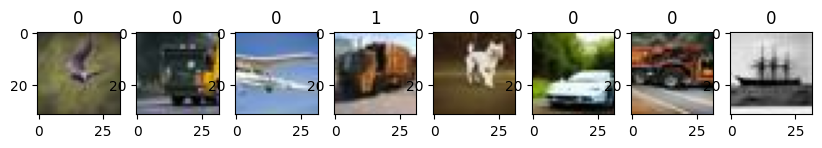

In [9]:
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [10]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


Scaling the data between 0 and 1

In [12]:
train_data = train_data.map(lambda x, y : (x/255, y))

In [13]:
scaled_it = train_data.as_numpy_iterator()

In [14]:
batch = scaled_it.next()

In [15]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


In [ ]:
#scaling test data
test_data = test_data.map(lambda x, y : (x/255, y))
scaled_it = test_data.as_numpy_iterator()
test_batch = scaled_it.next()
print(test_batch[0].min())
print(test_batch[0].max())
print(len(test_data))

0.0
1.0
625


Splitting the data into training, cross-validation sets

In [18]:
len(train_data)


3125

In [20]:
train_size = int(len(train_data)*0.8)
cv_size = int(len(train_data)*0.2)


In [21]:
train_size+cv_size

3125

In [22]:
train = train_data.take(train_size)
cv = train_data.skip(train_size).take(cv_size)


In [23]:
len(train)+len(cv)

3125

### Building the DL Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\vscode\FYP_final\FYP\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logdir = 'logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=8, validation_data=cv, callbacks=[tensorboard_callback])

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1076s 428ms/step - accuracy: 0.7438 - loss: 0.5014 - val_accuracy: 0.8535 - val_loss: 0.3388
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 406s 162ms/step - accuracy: 0.8559 - loss: 0.3335 - val_accuracy: 0.8788 - val_loss: 0.2894
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 125s 50ms/step - accuracy: 0.8780 - loss: 0.2905 - val_accuracy: 0.8603 - val_loss: 0.3245
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 257s 103ms/step - accuracy: 0.8940 - loss: 0.2587 - val_accuracy: 0.8760 - val_loss: 0.2960
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 168s 67ms/step - accuracy: 0.9022 - loss: 0.2418 - val_accuracy: 0.9051 - val_loss: 0.2382
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 144s 57ms/step - accuracy: 0.9072 - loss: 0.2273 - val_accuracy: 0.9030 - val_loss: 0.2353
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 217s 63ms/step - accuracy: 0.9134 - loss: 0.2165 - val_accuracy: 0.9008 - val_loss: 0.2464
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 164s 66ms/step - accuracy: 0.91

### Performance

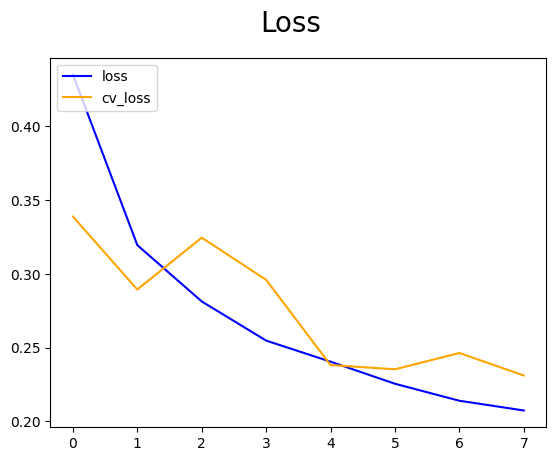

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

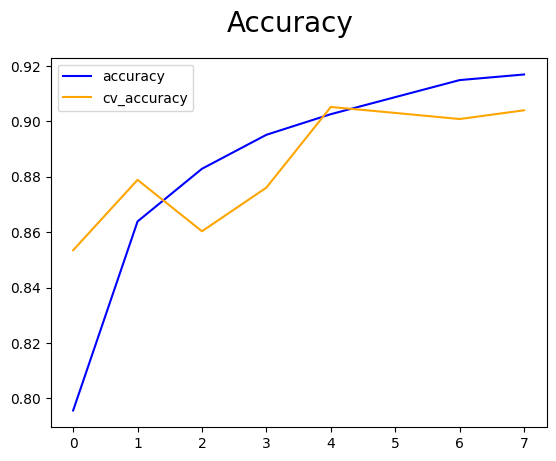

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [36]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━

In [37]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9026825428009033, Recall: 0.8950999975204468, Accuracy: 0.8992999792098999


In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save(os.path.join('model','ai_imageclassifier.h5'))

In [40]:
model = load_model(os.path.join('model','ai_imageclassifier.h5'))

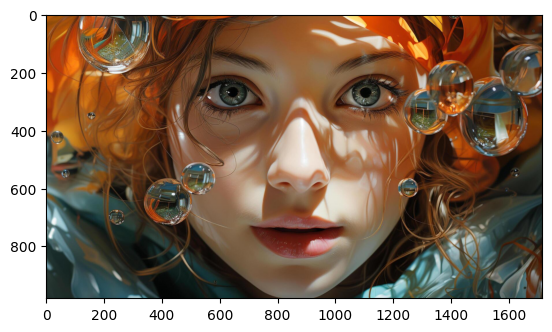

In [41]:
img = cv2.imread('ai1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [42]:
resize = tf.image.resize(img, (32, 32))

In [43]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


In [44]:
y_pred

array([[0.04061917]], dtype=float32)

In [45]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: AI
